    In today's technology-enabled world, maintaining human health has become difficult and people are now much more prone to diseases in daily life due to long screen times and minimal exercise. Diseases such as hypertension, obesity, stroke have become a common phenomenon for a large part of the population. Among all these, being able to detect or at least predict possible diseases as soon as possible is very important for saving human life. Also, in recent years, the healthcare industry has shifted from purely traditional disease diagnostic methods to Internet of Things (IoT), Machine learning (ML) and Artificial Intelligence (AI) etc. for effective disease diagnosis.
    
    Due to the big data advancement in the biomedical and health communities, it appears to have significant benefits in the accurate review of medical data, early disease recognition, patient care, and community service. When the quality of medical data is not sufficient, the accuracy of the study decreases. In addition, different regions exhibit unique manifestations of certain regional diseases, which may adversely affect the prediction of disease outbreaks.
    
    Using the methods of the Big Data concept, I will try to create a model that will predict possible diseases based on a person's symptoms.
    
    Data gathered from: https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

In [3]:
# Importing some libraries and dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("D:/pysp/pj/dataset_uncleaned.csv", encoding="utf8", errors='ignore') as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight

In [5]:
with open("D:/pysp/pj/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            key = str.encode(key).decode('utf-8')
            writer.writerow([key,v,dict_wt[key]])

In [6]:
columns = ['Disease','Symptom','Count of Disease Occurence']

In [7]:
data = pd.read_csv("D:/pysp/pj/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [8]:
data.head()

Disease              Symptom  Count of Disease Occurence
0  hypertensive disease           pain chest                        3363
1  hypertensive disease  shortness of breath                        3363
2  hypertensive disease            dizziness                        3363
3  hypertensive disease             asthenia                        3363
4  hypertensive disease                 fall                        3363

In [9]:
data.to_csv("D:/pysp/pj/dataset_clean.csv",index=False)

In [10]:
slist = []
dlist = []
with open("D:/pysp/pj/nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for key,values in dict_.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"Symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"Disease"])
            dlist.append(key)

In [11]:
nt_columns = ['Id','Label','Attribute']

In [12]:
nt_data = pd.read_csv("D:/pysp/pj/nodetable.csv",names=nt_columns, encoding ="ISO-8859-1")

In [13]:
nt_data.head()

Id                Label Attribute
0           pain chest           pain chest   Symptom
1  shortness of breath  shortness of breath   Symptom
2            dizziness            dizziness   Symptom
3             asthenia             asthenia   Symptom
4                 fall                 fall   Symptom

In [14]:
nt_data.to_csv("D:/pysp/pj/nodetable.csv",index=False)

# Database

In [15]:
import pymongo

# Establishing connection
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient()

# Creating a database
db = client.admin

In [16]:
coll=db.diseases

In [17]:
db.diseases.dtypes

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'admin'), 'diseases.dtypes')

In [18]:
coll.find_one({})

{'_id': ObjectId('62ace22c81dd5b96ba319218'),
 'Disease': 'hypertensive disease',
 'Symptom': 'pain chest',
 'Count of Disease Occurence': 3363}

In [19]:
len(list(coll.find({})))

2129

In [20]:
query = { "Symptom": { "$regex": '^shortness of breath$' } }
docs = db.diseases.count_documents(query)
print ("query:", query)
print ("$regex using '^___$' -- total:", docs, "\n")

query: {'Symptom': {'$regex': '^shortness of breath$'}}
$regex using '^___$' -- total: 49 



In [21]:
list(db.diseases.find({"Count of Disease Occurence": {"$gt": 3000}}, {"Symptom"}))

[{'_id': ObjectId('62ace22c81dd5b96ba319218'), 'Symptom': 'pain chest'},
 {'_id': ObjectId('62ace22c81dd5b96ba319219'),
  'Symptom': 'shortness of breath'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921a'), 'Symptom': 'dizziness'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921b'), 'Symptom': 'asthenia'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921c'), 'Symptom': 'fall'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921d'), 'Symptom': 'syncope'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921e'), 'Symptom': 'vertigo'},
 {'_id': ObjectId('62ace22c81dd5b96ba31921f'), 'Symptom': 'sweat'},
 {'_id': ObjectId('62ace22c81dd5b96ba319220'),
  'Symptom': 'sweating increased'},
 {'_id': ObjectId('62ace22c81dd5b96ba319221'), 'Symptom': 'palpitation'},
 {'_id': ObjectId('62ace22c81dd5b96ba319222'), 'Symptom': 'nausea'},
 {'_id': ObjectId('62ace22c81dd5b96ba319223'), 'Symptom': 'angina pectoris'},
 {'_id': ObjectId('62ace22c81dd5b96ba319224'), 'Symptom': 'pressure chest'}]

In [22]:
#db.dispd.insert_one(
#    {
#        'Disease': 'hypertensive disease',
#        'Symptom': 'angina pectoris',
#        'Count of Disease Occurence': 100
#    }
#)

In [23]:
#db.dispd.insert_many(
#    [
#      {
#        'Disease': 'Alzheimer's disease',
#        'Symptom': 'nausea',
#        'Count of Disease Occurence': "3000"
#      },
#      {
#        'Disease': 'anemia',
#        'Symptom': 'pressure chest'},
#        'Count of Disease Occurence': '2000',
#      }
#    ])

In [24]:
import pprint

coll1 = db.diseases.find()

for Symptom in coll1:
    pprint.pprint(Symptom)
    print()

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'pain chest',
 '_id': ObjectId('62ace22c81dd5b96ba319218')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319219')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'dizziness',
 '_id': ObjectId('62ace22c81dd5b96ba31921a')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'asthenia',
 '_id': ObjectId('62ace22c81dd5b96ba31921b')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'fall',
 '_id': ObjectId('62ace22c81dd5b96ba31921c')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'syncope',
 '_id': ObjectId('62ace22c81dd5b96ba31921d')}

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'vertigo',
 '_id': ObjectId('62ace22c81dd5

In [25]:
list ( coll.find( {'$or': [ {'Disease': 'hypertensive disease'},{'Symptom': 'dizziness'} ]}))    

[{'_id': ObjectId('62ace22c81dd5b96ba319218'),
  'Disease': 'hypertensive disease',
  'Symptom': 'pain chest',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba319219'),
  'Disease': 'hypertensive disease',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921a'),
  'Disease': 'hypertensive disease',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921b'),
  'Disease': 'hypertensive disease',
  'Symptom': 'asthenia',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921c'),
  'Disease': 'hypertensive disease',
  'Symptom': 'fall',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921d'),
  'Disease': 'hypertensive disease',
  'Symptom': 'syncope',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921e'),
  'Disease': 'hypertensive disease',
  'Symptom': 'verti

In [26]:
list ( coll.find( {'$and': [ {'Disease': 'hypertensive disease'},{'Symptom': 'syncope'} ]}))

[{'_id': ObjectId('62ace22c81dd5b96ba31921d'),
  'Disease': 'hypertensive disease',
  'Symptom': 'syncope',
  'Count of Disease Occurence': 3363}]

In [27]:
doc = db.diseases.find().sort("Disease", -1)

for x in doc:
    print(x)

{'_id': ObjectId('62ace22c81dd5b96ba3196ba'), 'Disease': 'upper respiratory infection', 'Symptom': 'cough', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196bb'), 'Disease': 'upper respiratory infection', 'Symptom': 'throat sore', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196bc'), 'Disease': 'upper respiratory infection', 'Symptom': 'wheezing', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196bd'), 'Disease': 'upper respiratory infection', 'Symptom': 'shortness of breath', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196be'), 'Disease': 'upper respiratory infection', 'Symptom': 'labored breathing', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196bf'), 'Disease': 'upper respiratory infection', 'Symptom': 'fever', 'Count of Disease Occurence': 135}
{'_id': ObjectId('62ace22c81dd5b96ba3196c0'), 'Disease': 'upper respiratory infection', 'Symptom': 'stuffy 

In [28]:
#all documents whose Symptom field value is not neither asthenia or fall
query = db.diseases.find({
    "Symptom" : { '$nin': [
        'asthenia',
        'fall']
    }
})

#print(len(list(query)))
list(query)

[{'_id': ObjectId('62ace22c81dd5b96ba319218'),
  'Disease': 'hypertensive disease',
  'Symptom': 'pain chest',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba319219'),
  'Disease': 'hypertensive disease',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921a'),
  'Disease': 'hypertensive disease',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921d'),
  'Disease': 'hypertensive disease',
  'Symptom': 'syncope',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921e'),
  'Disease': 'hypertensive disease',
  'Symptom': 'vertigo',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba31921f'),
  'Disease': 'hypertensive disease',
  'Symptom': 'sweat',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba319220'),
  'Disease': 'hypertensive disease',
  'Symptom': 'sweat

In [29]:
query2 = coll.find( {"Symptom": { "$eq": "dizziness" } } )
list(query2)

[{'_id': ObjectId('62ace22c81dd5b96ba31921a'),
  'Disease': 'hypertensive disease',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 3363},
 {'_id': ObjectId('62ace22c81dd5b96ba3192e4'),
  'Disease': 'anemia',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 544},
 {'_id': ObjectId('62ace22c81dd5b96ba319325'),
  'Disease': 'confusion',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 408},
 {'_id': ObjectId('62ace22c81dd5b96ba31940c'),
  'Disease': 'dehydration',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 297},
 {'_id': ObjectId('62ace22c81dd5b96ba3194b0'),
  'Disease': 'hyperlipidemia',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 247},
 {'_id': ObjectId('62ace22c81dd5b96ba319685'),
  'Disease': 'gastritis',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 140},
 {'_id': ObjectId('62ace22c81dd5b96ba31990b'),
  'Disease': 'hemorrhoids',
  'Symptom': 'dizziness',
  'Count of Disease Occurence': 80},
 {'_id': ObjectId('62ace

In [30]:
result = db.diseases.find({"Disease": {"$regex":"hypertensive disease","$options": 'i'}})
for item in result:
    print(item['Disease'],item['_id'],item['Symptom'],item['Count of Disease Occurence'])

hypertensive disease 62ace22c81dd5b96ba319218 pain chest 3363
hypertensive disease 62ace22c81dd5b96ba319219 shortness of breath 3363
hypertensive disease 62ace22c81dd5b96ba31921a dizziness 3363
hypertensive disease 62ace22c81dd5b96ba31921b asthenia 3363
hypertensive disease 62ace22c81dd5b96ba31921c fall 3363
hypertensive disease 62ace22c81dd5b96ba31921d syncope 3363
hypertensive disease 62ace22c81dd5b96ba31921e vertigo 3363
hypertensive disease 62ace22c81dd5b96ba31921f sweat 3363
hypertensive disease 62ace22c81dd5b96ba319220 sweating increased 3363
hypertensive disease 62ace22c81dd5b96ba319221 palpitation 3363
hypertensive disease 62ace22c81dd5b96ba319222 nausea 3363
hypertensive disease 62ace22c81dd5b96ba319223 angina pectoris 3363
hypertensive disease 62ace22c81dd5b96ba319224 pressure chest 3363


In [31]:
#dataout = db.diseases.find( { "$or": [{"Disease":{"$regex": "hypertensive disease", "$options": "-i"}}, {"Symptom":{"$regex": "shortness of breath", "$options": "-i"}}]}).sort('_id', pymongo.ASCENDING).limit(10)
dataout = db.diseases.find( { "$or": [{"Disease":{"$regex": "hypertensive disease", "$options": "-i"}}, {"Symptom":{"$regex": "shortness of breath", "$options": "-i"}}]}).sort('_id', pymongo.DESCENDING).limit(10)
list(dataout)

[{'_id': ObjectId('62ace22c81dd5b96ba319a42'),
  'Disease': 'adhesion',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 57},
 {'_id': ObjectId('62ace22c81dd5b96ba319a28'),
  'Disease': 'tachycardia sinus',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 56},
 {'_id': ObjectId('62ace22c81dd5b96ba3199cf'),
  'Disease': 'thrombus',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 67},
 {'_id': ObjectId('62ace22c81dd5b96ba3199bb'),
  'Disease': 'influenza',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 68},
 {'_id': ObjectId('62ace22c81dd5b96ba31997d'),
  'Disease': 'chronic alcoholic intoxication',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 70},
 {'_id': ObjectId('62ace22c81dd5b96ba319965'),
  'Disease': 'pericardial effusion body substance',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 71},
 {'_id': ObjectId('62ace22c81dd5b96ba319959'),
  'Disease': 'effusion p

In [32]:
list(db.diseases.find({ "Count of Disease Occurence": { "$gt": 70 }}))
len(list(db.diseases.find({ "Count of Disease Occurence": { "$gt": 70 }})))

1879

In [33]:
from collections import Counter

def get_no_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

for Symptom in coll.find({'Symptom': 'shortness of breath'}):
    pprint.pprint(Symptom)

{'Count of Disease Occurence': 3363,
 'Disease': 'hypertensive disease',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319219')}
{'Count of Disease Occurence': 1421,
 'Disease': 'diabetes',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319227')}
{'Count of Disease Occurence': 1284,
 'Disease': 'coronary arteriosclerosis',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319260')}
{'Count of Disease Occurence': 1284,
 'Disease': 'coronary heart disease',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba31926a')}
{'Count of Disease Occurence': 1029,
 'Disease': 'pneumonia',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319275')}
{'Count of Disease Occurence': 963,
 'Disease': 'failure heart congestive',
 'Symptom': 'shortness of breath',
 '_id': ObjectId('62ace22c81dd5b96ba319285')}
{'Count of Disease Occurence': 835,
 'Disease': 'asthma',
 'Symptom': 'shortness of breat

In [34]:
agg_sample = db.diseases.aggregate([
    ## stage 1
    {
        "$match" : 
                 {"Count of Disease Occurence" : {"$eq" : 3363 } }
    },
    ## stage 2
    {
        "$count" : "total_rows"
    }
])

for i in agg_sample:
    print(i)

{'total_rows': 13}


In [35]:
%%time
import time
start = time.time()
agg_samp2 = db.diseases.find({
    "$and" : [
        { 
            "Disease" : {
            "$regex" : "^s"
        }},
        {
            "Symptom" : {
                "$regex" : "e$"
        }}
    ]
})
end = time.time()
print(end - start)

for i in agg_samp2:
    print(i)

0.0
{'_id': ObjectId('62ace22c81dd5b96ba3193d3'), 'Disease': 'septicemia', 'Symptom': 'haemorrhage', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba3193d5'), 'Disease': 'septicemia', 'Symptom': 'rale', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba3193e1'), 'Disease': 'systemic infection', 'Symptom': 'haemorrhage', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba3193e3'), 'Disease': 'systemic infection', 'Symptom': 'rale', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba3193ef'), 'Disease': 'sepsis (invertebrate)', 'Symptom': 'haemorrhage', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba3193f1'), 'Disease': 'sepsis (invertebrate)', 'Symptom': 'rale', 'Count of Disease Occurence': 311}
{'_id': ObjectId('62ace22c81dd5b96ba319614'), 'Disease': 'stenosis aortic valve', 'Symptom': 'syncope', 'Count of Disease Occurence': 158}
{'_id': ObjectId('62ace22c81dd5b96ba319637'), 'D

In [36]:
agg_samp3 = db.diseases.find({
    "Count of Disease Occurence" : { "$ne" : 3363}
})

for i in agg_samp3:
    print(i)

{'_id': ObjectId('62ace22c81dd5b96ba319225'), 'Disease': 'diabetes', 'Symptom': 'polyuria', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba319226'), 'Disease': 'diabetes', 'Symptom': 'polydypsia', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba319227'), 'Disease': 'diabetes', 'Symptom': 'shortness of breath', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba319228'), 'Disease': 'diabetes', 'Symptom': 'pain chest', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba319229'), 'Disease': 'diabetes', 'Symptom': 'asthenia', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba31922a'), 'Disease': 'diabetes', 'Symptom': 'nausea', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba31922b'), 'Disease': 'diabetes', 'Symptom': 'orthopnea', 'Count of Disease Occurence': 1421}
{'_id': ObjectId('62ace22c81dd5b96ba31922c'), 'Disease': 'diabetes', 'Symptom': 'rale', 'C

In [37]:
list(db.diseases.aggregate([
  { "$match" : { "Disease" : 'hypertensive disease', "Symptom" : 'shortness of breath' } }
]))

[{'_id': ObjectId('62ace22c81dd5b96ba319219'),
  'Disease': 'hypertensive disease',
  'Symptom': 'shortness of breath',
  'Count of Disease Occurence': 3363}]

In [38]:
dis_df=pd.DataFrame(list(coll.find({})))
dis_df

_id               Disease              Symptom  \
0     62ace22c81dd5b96ba319218  hypertensive disease           pain chest   
1     62ace22c81dd5b96ba319219  hypertensive disease  shortness of breath   
2     62ace22c81dd5b96ba31921a  hypertensive disease            dizziness   
3     62ace22c81dd5b96ba31921b  hypertensive disease             asthenia   
4     62ace22c81dd5b96ba31921c  hypertensive disease                 fall   
...                        ...                   ...                  ...   
2124  62ace22c81dd5b96ba319a64         affect labile            bedridden   
2125  62ace22c81dd5b96ba319a65         affect labile           prostatism   
2126  62ace22c81dd5b96ba319a66       decubitus ulcer      systolic murmur   
2127  62ace22c81dd5b96ba319a67       decubitus ulcer                frail   
2128  62ace22c81dd5b96ba319a68       decubitus ulcer                fever   

      Count of Disease Occurence  
0                           3363  
1                           3363  
2                           3363  
3                           3363  
4                           3363  
...                          ...  
2124                          45  
2125                          45  
2126                          42  
2127                          42  
2128                          42  

[2129 rows x 4 columns]

In [39]:
dis_df = dis_df.drop("_id", axis=1)
dis_df

Disease              Symptom  Count of Disease Occurence
0     hypertensive disease           pain chest                        3363
1     hypertensive disease  shortness of breath                        3363
2     hypertensive disease            dizziness                        3363
3     hypertensive disease             asthenia                        3363
4     hypertensive disease                 fall                        3363
...                    ...                  ...                         ...
2124         affect labile            bedridden                          45
2125         affect labile           prostatism                          45
2126       decubitus ulcer      systolic murmur                          42
2127       decubitus ulcer                frail                          42
2128       decubitus ulcer                fever                          42

[2129 rows x 3 columns]

In [42]:
from sklearn import preprocessing

In [43]:
n_unique = len(dis_df['Symptom'].unique())
n_unique

405

In [44]:
len(dis_df['Disease'].unique())

149

In [45]:
dis_df.dtypes

Disease                       object
Symptom                       object
Count of Disease Occurence     int64
dtype: object

In [46]:
df = pd.DataFrame(dis_df)

In [47]:
df_1 = pd.get_dummies(dis_df.Symptom)

In [48]:
df_1.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial  ...  \
0                            0         0                  0  ...   
1                            0         0                  0  ...   
2                            0         0                  0  ...   
3                            0         0                  0  ...   
4                            0         0                  0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 404 columns]

In [49]:
df.head()

Disease              Symptom  Count of Disease Occurence
0  hypertensive disease           pain chest                        3363
1  hypertensive disease  shortness of breath                        3363
2  hypertensive disease            dizziness                        3363
3  hypertensive disease             asthenia                        3363
4  hypertensive disease                 fall                        3363

In [50]:
df_s = df['Disease']

In [51]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [52]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [53]:
df_pivoted[:5]

Disease  Heberden's node  Murphy's sign  Stahli's line  \
0  hypertensive disease                0              0              0   
1  hypertensive disease                0              0              0   
2  hypertensive disease                0              0              0   
3  hypertensive disease                0              0              0   
4  hypertensive disease                0              0              0   

   abdomen acute  abdominal bloating  abdominal tenderness  \
0              0                   0                     0   
1              0                   0                     0   
2              0                   0                     0   
3              0                   0                     0   
4              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [54]:
len(df_pivoted)

2116

In [55]:
cols = df_pivoted.columns

In [56]:
cols = cols[1:]

In [57]:
df_pivoted = df_pivoted.groupby('Disease').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:6]

Disease  Heberden's node  Murphy's sign  \
0                 Alzheimer's disease                0              0   
1                                 HIV                0              0   
2        Pneumocystiscariniipneumonia                0              0   
3             accidentcerebrovascular                0              0   
4  acquiredimmuno-deficiency syndrome                0              0   
5                      adenocarcinoma                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0                   0                     0   
4              0              0                   0                     0   
5              0              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   
5                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 1   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   
5               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              1  
3         0         0      0              0  
4         0         0      0              0  
5         0         0      0              0  

[6 rows x 405 columns]

In [58]:
len(df_pivoted)

149

In [59]:
df_pivoted.to_csv("D:/pysp/pj/df_pivoted.csv")

### Trying out  to learn diseases from the symptoms

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection  import train_test_split

In [61]:
x = df_pivoted[cols]
y = df_pivoted['Disease']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

In [63]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [64]:
mnb.score(x_test, y_test)

0.0

It can't predict about unseen data because has never seen that disease before.

In [65]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [66]:
mnb_tot.score(x, y)

0.8993288590604027

In [67]:
disease_pred = mnb_tot.predict(x)

In [68]:
disease_real = y.values

In [69]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} \nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: HIV 
Actual: acquiredimmuno-deficiency syndrome

Pred: biliary calculus 
Actual: cholelithiasis

Pred: coronary arteriosclerosis 
Actual: coronary heart disease

Pred: depression mental 
Actual: depressive disorder

Pred: HIV 
Actual: hiv infections

Pred: carcinoma breast 
Actual: malignant neoplasm of breast

Pred: carcinoma of lung 
Actual: malignant neoplasm of lung

Pred: carcinoma prostate 
Actual: malignant neoplasm of prostate

Pred: carcinoma colon 
Actual: malignant tumor of colon

Pred: candidiasis 
Actual: oralcandidiasis

Pred: effusion pericardial 
Actual: pericardial effusion body substance

Pred: malignant neoplasms 
Actual: primary malignant neoplasm

Pred: sepsis (invertebrate) 
Actual: septicemia

Pred: sepsis (invertebrate) 
Actual: systemic infection

Pred: tonic-clonic epilepsy 
Actual: tonic-clonic seizures



## Training a decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [71]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Accuracy: ", clf_dt.score(x,y))

Accuracy:  0.8993288590604027


In [72]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='D:/pysp/pj/tree2.dot', feature_names=cols)

In [73]:
!dot -Tpng tree2.dot -o tree2.png

In [74]:
from IPython.display import Image
Image(filename='D:/pysp/pj/tree2.png')

In [75]:
data = pd.read_csv("D:/pysp/pj/Training.csv")

In [76]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [77]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [78]:
len(data.columns)

133

In [79]:
df = pd.DataFrame(data)

In [80]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [81]:
len(df)

4920

In [82]:
cols = df.columns

In [83]:
cols = cols[:-1]

In [84]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [85]:
len(cols)

132

In [86]:
x = df[cols]
y = df['prognosis']

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection  import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

In [89]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [90]:
mnb.score(x_test, y_test)

1.0

In [91]:
from sklearn import model_selection
print ("========Cross Validation Result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

========Cross Validation Result========
[1. 1. 1.]
1.0


In [92]:
test_data = pd.read_csv("D:/pysp/pj/Testing.csv")

In [93]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [94]:
testx = test_data[cols]
testy = test_data['prognosis']

In [95]:
mnb.score(testx, testy)

1.0

## Training another decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

In [98]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print ("Accuracy: ", clf_dt.score(x_test,y_test))

Accuracy:  1.0


In [99]:
from sklearn import model_selection
print ("========Cross validation result========")
scores = model_selection.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

========Cross validation result========
[0.9695122  0.95528455 0.98170732]
0.9688346883468834


In [100]:
print ("Accuracy on the actual test data: ", clf_dt.score(testx,testy))

Accuracy on the actual test data:  1.0


In [101]:
export_graphviz(dt, out_file='D:/pysp/pj/tree.dot', feature_names=cols)

In [102]:
!dot -Tpng tree.dot -o tree.png

In [103]:
Image(filename='D:/pysp/pj/tree.png')

In [104]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
        'back_pai

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

In [106]:
features = cols

In [107]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 41 - mild_fever (0.026976)
2. feature 72 - brittle_nails (0.026189)
3. feature 114 - stomach_bleeding (0.026163)
4. feature 101 - abnormal_menstruation (0.026132)
5. feature 33 - dark_urine (0.025671)
6. feature 111 - receiving_blood_transfusion (0.025580)
7. feature 27 - breathlessness (0.025235)
8. feature 55 - congestion (0.024990)
9. feature 36 - pain_behind_the_eyes (0.024990)
10. feature 126 - silver_like_dusting (0.024931)
11. feature 86 - unsteadiness (0.024906)
12. feature 129 - blister (0.024878)
13. feature 60 - pain_in_anal_region (0.024627)
14. feature 19 - weight_loss (0.024431)
15. feature 58 - fast_heart_rate (0.024400)
16. feature 104 - increased_appetite (0.024400)
17. feature 99 - red_spots_over_body (0.024399)
18. feature 91 - continuous_feel_of_urine (0.024301)
19. feature 107 - mucoid_sputum (0.024009)
20. feature 7 - stomach_pain (0.023882)


In [108]:
export_graphviz(dt, out_file='D:/pysp/pj/tree-top3.dot', feature_names=cols, max_depth = 3)

In [109]:
!dot -Tpng tree-top3.dot -o tree-top3.png

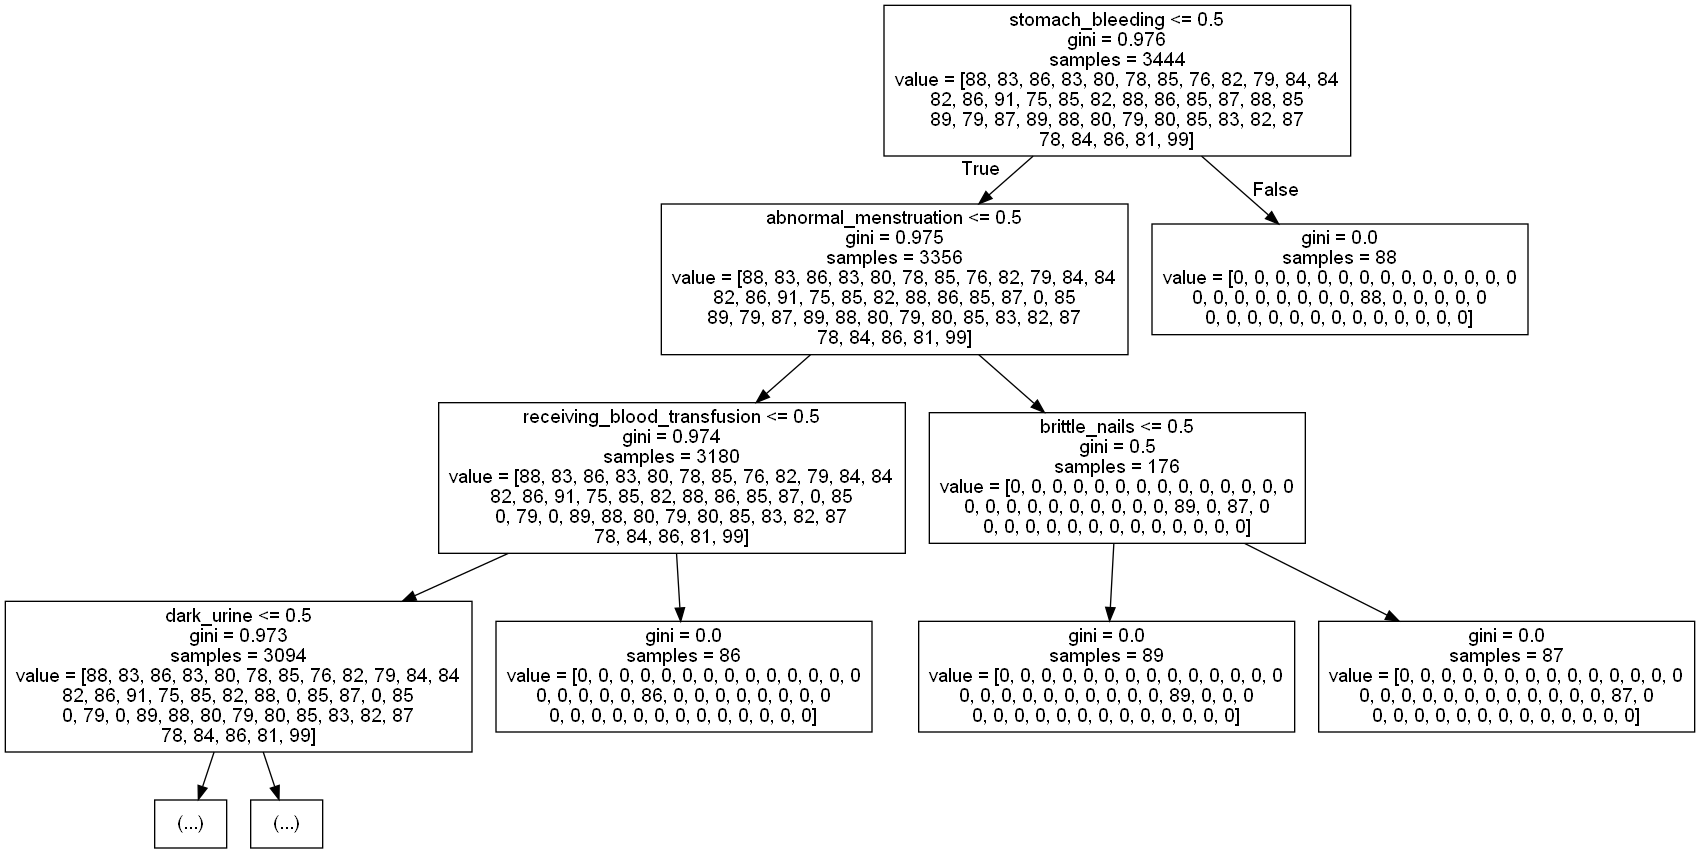

In [110]:
Image(filename='D:/pysp/pj/tree-top3.png')

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.00316334 0.         0.00203527 0.02084806 0.00174697 0.
 0.         0.02388193 0.         0.00319083 0.01996763 0.00102048
 0.         0.00231856 0.00287456 0.         0.         0.
 0.         0.02443088 0.         0.         0.00260757 0.
 0.02252588 0.         0.02199352 0.02523533 0.00259613 0.00175259
 0.         0.         0.         0.0256712  0.         0.
 0.02498959 0.00202714 0.         0.00226773 0.00116079 0.02697574
 0.         0.01207108 0.         0.         0.         0.
 0.         0.         0.02316473 0.         0.         0.
 0.         0.02499031 0.00146319 0.01829754 0.02440026 0.
 0.02462659 0.         0.         0.00147046 0.         0.
 0.02255747 0.         0.         0.         0.         0.
 0.02618891 0.         0.00089292 0.         0.         0.02349406
 0.         0.02148024 0.         0.00089292 0.         0.02181415
 0.00114591 0.         0.02490587 0.00145775 0.         0.
 0.00111615 0.02430115 0.02333373 0.0011693  0.02368887 0.
 0.02228305 0.02

In [112]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['mild_fever', 'brittle_nails', 'stomach_bleeding', 'abnormal_menstruation', 'dark_urine', 'receiving_blood_transfusion', 'breathlessness', 'congestion', 'pain_behind_the_eyes', 'silver_like_dusting', 'unsteadiness', 'blister', 'pain_in_anal_region', 'weight_loss', 'fast_heart_rate', 'increased_appetite', 'red_spots_over_body', 'continuous_feel_of_urine', 'mucoid_sputum', 'stomach_pain', 'toxic_look_(typhos)', 'altered_sensorium', 'lack_of_concentration', 'slurred_speech', 'distention_of_abdomen', 'passage_of_gases', 'blackheads', 'phlegm', 'family_history', 'muscle_pain', 'bruising', 'cough', 'irritability', 'sunken_eyes', 'movement_stiffness', 'hip_joint_pain', 'continuous_sneezing', 'muscle_wasting', 'weakness_in_limbs', 'dischromic _patches', 'yellowing_of_eyes', 'ulcers_on_tongue', 'itching', 'fatigue', 'patches_in_throat', 'sweating', 'spotting_ urination', 'abdominal_pain', 'pus_filled_pimples', 'nodal_skin_eruptions', 'back_pain', 'dehydration', 'shivering', 'red_sore_around_no

In [113]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [114]:
feature_dict['brittle_nails']

72

In [115]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns) 
print(cols.index('sinus_pressure'))

53


In [116]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [117]:
dt.predict(sample_x)

D:\ptn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [118]:
dt.predict_proba(sample_x)

D:\ptn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [119]:
len(sample_x)

1

In [120]:
symptoms = ['skin_rash','itching','sinus_pressure','brittle_nails','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
    ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Migraine']


D:\ptn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ptn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])